<a href="https://colab.research.google.com/github/gabrielcgo/modulo03_BLUE/blob/main/Modulo3_5_projeto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 03** / *Módulo Extra*

Essa análise é uma atividade proposta pela Blue EdTech com o objetivo de aplicação prática dos conteúdos ensinados para obtenção parcial da nota do módulo extra.

A atividade é composta por 4 questões práticas que serão resolvidas ao decorrer desta apresentação.

# Import modules

*   Para ler o conjunto de imagens, ultilizamos o Os
*   Para trabalhar com Datasets, ultilizamos o Pandas
*   O Numpy para trabalhar com arrays
*   O Matplotlib para visualizar gráficos

*   PIL para processar as imagens
*   Sklearn para estatística e Machine Learning
*   Keras foi utilizado para Deep Learning
*   Tensorflow como suporte para Machine Learning e Deep learning

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import resnet50
from keras.layers import Dense, Flatten
from keras.models import Model, Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Uma breve explicação

*PIL - Pillow Python:*

Python Imaging Library - adiciona recursos de processamento de imagem ao interpretador. Oferece suporte à vários formatos, conta com uma representação interna eficiente e ótimo motor para processamento de imagens, pois foi projetado para acessar rapidamente os dados armazenados em alguns formatos básicos de pixel. Fornece uma base sólida para uma ferramenta geral de processamento de imagens.

.

*TensorFlow + Keras:*

O TensorFlow é uma plataforma de Machine Learning de código aberto. Uma camada de infraestrutura para programação diferenciável que combina quatro habilidades principais:

*   Execução eficiente de operações de tensor de baixo nível na CPU, GPU ou TPU.
*   Cálculo do gradiente de expressões diferenciáveis ​​arbitrárias.
*   Dimensionamento da computação para muitos dispositivos, como clusters de centenas de GPUs.
*   Exportação de programas ("gráficos") para ambientes de execução externos, como servidores, navegadores, dispositivos móveis e incorporados.


O Keras é a API de alto nível do TensorFlow: uma interface acessível e altamente produtiva para resolver problemas de Machine Learning, com foco no Deep Learning moderno. Ele fornece abstrações essenciais e blocos de construção para desenvolver e enviar soluções de ML com alta velocidade de iteração.


# Starting Analysis

Efetivamente vamos iniciar a análise.

**SOBRE ESSE DATASET:**

Os dados a seguir são imagens de folhas de videiras de cinco espécies diferentes. 

O principal produto da videira são as uvas que são consumidas in natura ou processadas. Além disso, as folhas de videira são colhidas uma vez por ano como subproduto. As espécies de folhas de videira são importantes em termos de preço e sabor. Neste estudo, a classificação baseada em DL é conduzida usando imagens de folhas de videira. Para isso, foram tiradas imagens de 500 folhas de videira pertencentes a 5 espécies com um sistema especial de auto-iluminação. As espécies são:

*  Ak
*  Ala Idris
*  Büzgülü
*  Dimnit
*  Nazli

***
**CITAÇÕES:**

Koklu, M., Unlersen, MF, Ozkan, IA, Aslan, MF, & Sabanci, K. (2022). Um estudo CNN-SVM baseado em características profundas selecionadas para classificação de folhas de videira. Measurement, 188, 110425. Doi: https://doi.org/10.1016/j.measurement.2021.110425

In [3]:
# Importando as imagens do dataset

ak = os.listdir('/content/drive/MyDrive/Grapes/Ak')
ala_idris = os.listdir('/content/drive/MyDrive/Grapes/Ala_Idris')
buzgulu = os.listdir('/content/drive/MyDrive/Grapes/Buzgulu')
dimnit = os.listdir('/content/drive/MyDrive/Grapes/Dimnit')
nazli = os.listdir('/content/drive/MyDrive/Grapes/Nazli')


<BarContainer object of 5 artists>

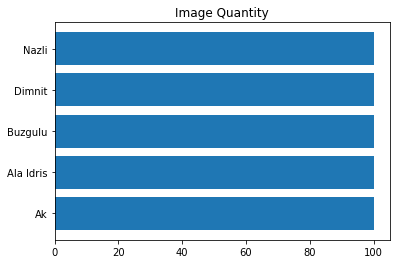

In [4]:
# Apenas para ver se todas as imagens carregaram e se está balanceada.

count_type = [len(ak),len(ala_idris),len(buzgulu),len(dimnit),len(nazli)]
title = ['Ak','Ala Idris','Buzgulu','Dimnit','Nazli']

plt.title('Image Quantity')
plt.barh(title, count_type)

Podemos ver que todas as imagens foram carregadas e que o dataset está balanceado com 100 imagens de folhas de cada espécie de videira.

In [5]:
# Defini x e y como uma lista

x = []
y = []
img_w, img_h = 32, 32

In [6]:
# Comecei a carregar as imagens em cada um

for i in ak:
  image = Image.open(f'/content/drive/MyDrive/Grapes/Ak/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(0)

In [7]:
for i in ala_idris:
  image = Image.open(f'/content/drive/MyDrive/Grapes/Ala_Idris/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(1)

In [8]:
for i in buzgulu:
  image = Image.open(f'/content/drive/MyDrive/Grapes/Buzgulu/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(2)

In [9]:
for i in dimnit:
  image = Image.open(f'/content/drive/MyDrive/Grapes/Dimnit/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(3)

In [10]:
for i in nazli:
  image = Image.open(f'/content/drive/MyDrive/Grapes/Nazli/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(4)

In [11]:
x = np.asarray(x)
x = x.astype('float32')
x /= 255
y = np.asarray(y)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# **1)** Escolha uma rede pré-treinada em imagens para fazer transferência de aprendizado por meio de fine-tuning (2,5 pontos):

In [13]:
# A rede escolhida foi a ResNet50

print("Loading the ResNet50-ImageNet model")
model = resnet50.ResNet50(input_shape=(32, 32, 3), weights='imagenet', include_top=False)
model = Model(inputs=model.input, outputs=model.get_layer(index=-1).output)

print("\tAdding new layers to the model ...")
newTop = Sequential()
newTop.add(Flatten(input_shape=model.output_shape[1:]))
newTop.add(Dense(10, activation='softmax'))

print("\tSet fine-tuning configuration...")
model = Model(inputs=model.input, outputs=newTop(model.output))
model.summary()


model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Loading the ResNet50-ImageNet model
94781440/94765736 [==============================] - 4s 0us/step
	Adding new layers to the model ...
	Set fine-tuning configuration...
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNorm

a) Determine quais camadas serão acrescentadas, o tamanho do batch, a quantidade de épocas e a forma de treinamento (fit ou train_on_batch).

R = O tamanho do Bath foi 32 e o número de épocas foi 10. O método de treinamento foi train_on_batch.

In [14]:
batch_size = 32
number_epochs = 10

print("Training the model ...")
batches = list(range(0, len(y_train), batch_size))
perm = np.random.permutation(len(y_train))

errLoss = []
accLoss = []
errLoss.append(1)
accLoss.append(0)

for e in range(0, number_epochs):
    for b in batches:
        if b + batch_size < len(y_train):
            x = x_train[perm[b : b + batch_size]]
            y = y_train[perm[b : b + batch_size]]
        else:
            x = x_train[perm[b : ]]
            y = y_train[perm[b : ]]
        loss = model.train_on_batch(x, y)

    print("\tEpoch %i. [Error, Accuracy]: %.15f, %.15f " % (e+1, loss[0], loss[1]))
    errLoss.append(loss[0])
    accLoss.append(loss[1])

Training the model ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


	Epoch 1. [Error, Accuracy]: 3.429978847503662, 0.187500000000000 
	Epoch 2. [Error, Accuracy]: 1.438490748405457, 0.500000000000000 
	Epoch 3. [Error, Accuracy]: 1.584488868713379, 0.437500000000000 
	Epoch 4. [Error, Accuracy]: 1.227105855941772, 0.437500000000000 
	Epoch 5. [Error, Accuracy]: 1.725108265876770, 0.437500000000000 
	Epoch 6. [Error, Accuracy]: 1.332072019577026, 0.500000000000000 
	Epoch 7. [Error, Accuracy]: 0.964299559593201, 0.625000000000000 
	Epoch 8. [Error, Accuracy]: 0.589784145355225, 0.875000000000000 
	Epoch 9. [Error, Accuracy]: 0.424305975437164, 0.812500000000000 
	Epoch 10. [Error, Accuracy]: 0.328808009624481, 0.937500000000000 


Ploting training loss ...


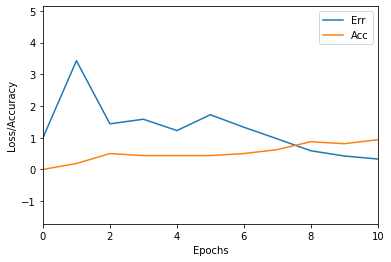

In [15]:
print("Ploting training loss ...")
plt.plot(errLoss, label="Err")
plt.plot(accLoss, label="Acc")
plt.xlim([0, len(errLoss)-1])
plt.legend(loc='upper right')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epochs')
plt.margins(0.5, 0.5)
plt.show()

In [16]:
print("Testing the model ...")
acc = model.evaluate(x_test, y_test, batch_size=batch_size)
#print(model.metrics_names)
print("\tTop-1 Accuracy: %f" % acc[1])

Testing the model ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


4/4 [==============================] - 1s 103ms/step - loss: 37.7743 - accuracy: 0.2800
	Top-1 Accuracy: 0.280000


# **2)** Considerando a mesma rede pré-treinada do exercício anterior, faça fine-tuning congelando algumas camadas. Determine a quantidade de camadas a serem congeladas, indique o setup escolhido e compare o resultado obtido em relação ao fine-tuning convencional. (2,5 pontos)

In [17]:
for layer in model.layers[:-int(10)]:
    layer.trainable = False

In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('\tTraining set shape: ', y_train.shape)
print('\tTesting set shape: ', x_test.shape)
print('\tTraining label shape: ', y_train.shape)
print('\tTesting label shape: ', x_test.shape)

	Training set shape:  (400, 5)
	Testing set shape:  (100, 32, 32, 3)
	Training label shape:  (400, 5)
	Testing label shape:  (100, 32, 32, 3)


# **3)** Considerando a mesma rede pré-treinada do primeiro exercício, faça fine-tuning com Data Augmentation. Explore essas técnicas e verifique se sua utilização melhora a performance do modelo. Não fique restrito às técnicas de exemplo. Estude as demais funções existentes no pacote ImageGenerator. (2,5 pontos)

In [19]:
def kerasAugmentation(X, Y, augmentation, qtdade):
  print("\tCreating data augmentation usign Keras ...")
  
  # determinando o gerador das imagens a ser utilizado e sua configuração
  if (augmentation == "Rotation"):
    datagen = ImageDataGenerator(rotation_range=90)
  elif (augmentation == "Shift"):
    datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
  elif (augmentation == "Flip"):
    datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
    
  images = []
  labels = []

  for i in range(0, X.shape[0]):
    it = datagen.flow(np.expand_dims(X[i], 0), batch_size=1) # passamos 1 imagem por vez
    for j in range(0, qtdade):
      batch = it.next() # selecionamos a próxima imagem gerada
      images.append(batch[0].astype(np.uint8)) # convertemos esta imagem na codificação adequada para o nosso conjunto de dados
      labels.append(Y[i])
      
  images = np.array(images)
  labels = np.array(labels)
  return images, labels

# chamada da função; após, concatenamos os dados gerados aos dados originais
images, labels = kerasAugmentation(x_train, y_train, "Shift", 1)
x_train = np.concatenate((x_train, images), axis=0)
y_train = np.concatenate((y_train, labels), axis=0)

print('\tTraining set shape: ', x_train.shape)
print('\tTesting set shape: ', x_test.shape)
print('\tTraining label shape: ', y_train.shape)
print('\tTesting label shape: ', y_test.shape)

	Creating data augmentation usign Keras ...
	Training set shape:  (800, 32, 32, 3)
	Testing set shape:  (100, 32, 32, 3)
	Training label shape:  (800, 5)
	Testing label shape:  (100, 5)
